# Parkinsons Telemonitoring Data Set 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.cross_decomposition import PLSRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

from pyearth import Earth
import xgboost as xgb
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('parkinsons_updrs.data')

In [3]:
data["subject#"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
subject#         5875 non-null int64
age              5875 non-null int64
sex              5875 non-null int64
test_time        5875 non-null float64
motor_UPDRS      5875 non-null float64
total_UPDRS      5875 non-null float64
Jitter(%)        5875 non-null float64
Jitter(Abs)      5875 non-null float64
Jitter:RAP       5875 non-null float64
Jitter:PPQ5      5875 non-null float64
Jitter:DDP       5875 non-null float64
Shimmer          5875 non-null float64
Shimmer(dB)      5875 non-null float64
Shimmer:APQ3     5875 non-null float64
Shimmer:APQ5     5875 non-null float64
Shimmer:APQ11    5875 non-null float64
Shimmer:DDA      5875 non-null float64
NHR              5875 non-null float64
HNR              5875 non-null float64
RPDE             5875 non-null float64
DFA              5875 non-null float64
PPE              5875 non-null float64
dtypes: float64(19), int64(3)
memory usag

In [5]:
Y = data[["motor_UPDRS", "total_UPDRS"]]
X = data.drop(["motor_UPDRS", "total_UPDRS"], axis=1)

In [6]:
X.head().T

,0,1,2,3,4
subject#,1.000000,1.000000,1.000000,1.000000,1.000000
age,72.000000,72.000000,72.000000,72.000000,72.000000
sex,0.000000,0.000000,0.000000,0.000000,0.000000
test_time,5.643100,12.666000,19.681000,25.647000,33.642000
Jitter(%),0.006620,0.003000,0.004810,0.005280,0.003350
Jitter(Abs),0.000034,0.000017,0.000025,0.000027,0.000020
Jitter:RAP,0.004010,0.001320,0.002050,0.001910,0.000930
Jitter:PPQ5,0.003170,0.001500,0.002080,0.002640,0.001300
Jitter:DDP,0.012040,0.003950,0.006160,0.005730,0.002780
Shimmer,0.025650,0.020240,0.016750,0.023090,0.017030


In [7]:
Y.head().T

,0,1,2,3,4
motor_UPDRS,28.199,28.447,28.695,28.905,29.187
total_UPDRS,34.398,34.894,35.389,35.810,36.375


In [8]:
# choose total_UPDRS as predictable value
Y = Y['total_UPDRS']
Y_bool = (Y>30)*1

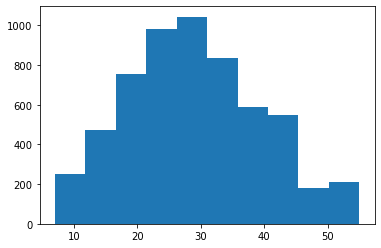

In [9]:
plt.hist(Y, label="total_UPDRS");

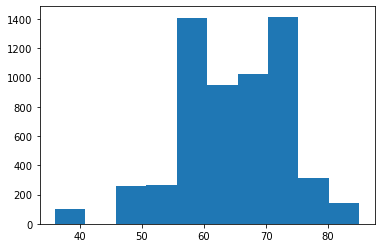

In [10]:
plt.hist(X['age'], label="age");


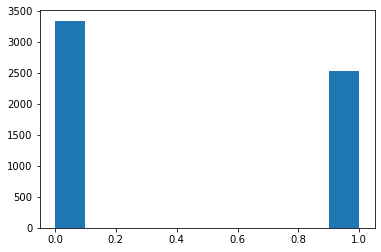

In [11]:
plt.hist(Y_bool, label="UPDRS>30");


In [12]:
def scores_r2_mse(x, y):
    print("R2: " + str(r2_score(x, y)))
    print("MSE: " + str(mean_squared_error(x, y)))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train_clsf, X_test_clsf, y_train_clsf, y_test_clsf = train_test_split(X, Y_bool, test_size=0.2, random_state=0)

## Linear regression

In [14]:
lin_reg = LinearRegression().fit(X_train, y_train)

In [15]:
scores_r2_mse(lin_reg.predict(X_test), y_test)

R2: -1.943980455389379
MSE: 85.58900545657735


##  Ridge regression

In [16]:
ridge = Ridge().fit(X_train, y_train)

In [17]:
scores_r2_mse(ridge.predict(X_test), y_test)

R2: -2.174703606552441
MSE: 85.83789525739736


## Lasso

In [18]:
lasso = Lasso().fit(X_train, y_train)

In [19]:
scores_r2_mse(lasso.predict(X_test), y_test)

R2: -4.012048559528826
MSE: 92.55726724252094


## Elastic net

In [20]:
elastic = ElasticNet().fit(X_train, y_train)

In [21]:
scores_r2_mse(elastic.predict(X_test), y_test)

R2: -3.812056785409352
MSE: 91.98893787516242


## PLS regression

In [22]:
pls2 = PLSRegression().fit(X_train, y_train)

In [23]:
scores_r2_mse(pls2.predict(X_test), y_test)

R2: -2.378484329771905
MSE: 88.97247572932866


## MARS

In [24]:
mars = Earth().fit(X_train, y_train)

In [25]:
scores_r2_mse(mars.predict(X_test), y_test)

R2: -1.0900612345706353
MSE: 79.7775115592738


## SVM

In [26]:
svc = SVC()
parameters = {'C':[1, 2, 3, 5, 10, 20]}
svm_gs = GridSearchCV(svc, parameters);
svm_gs.fit(X_train_clsf, y_train_clsf);

In [27]:
svm_gs.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [28]:
scores_r2_mse(svm_gs.best_estimator_.predict(X_test_clsf), y_test_clsf)

R2: 0.9792127377266696
MSE: 0.005106382978723404


## Neural networks

### KNN

In [29]:
parameters = {'n_neighbors':list(range(2,10))}
knn = KNeighborsClassifier()
knn_gs = GridSearchCV(knn, parameters).fit(X_train_clsf, y_train_clsf)

In [30]:
knn_gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [31]:
scores_r2_mse(knn_gs.predict(X_test_clsf), y_test_clsf)

R2: 0.9407210222989857
MSE: 0.01446808510638298


### Random Forest

In [32]:
parameters = {'n_estimators':[50, 100, 200], 'max_depth':[5, 10, 15, 20, 25]}
rfclsf = RandomForestClassifier()
rfclsf_gs = GridSearchCV(rfclsf, parameters).fit(X_train_clsf, y_train_clsf)

In [33]:
rfclsf_gs.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [34]:
scores_r2_mse(rfclsf_gs.predict(X_test_clsf), y_test_clsf)

R2: 0.9031652313144216
MSE: 0.023829787234042554


## XGBoost

In [39]:
xgb=XGBClassifier(random_state=1,learning_rate=0.5, n_jobs = -1).fit(X_train_clsf, y_train_clsf)

In [40]:
scores_r2_mse(xgb.predict(X_test_clsf), y_test_clsf)

R2: 1.0
MSE: 0.0
